In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

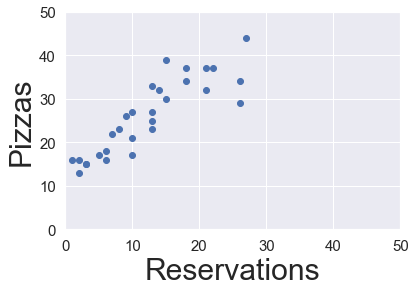

In [2]:
sns.set()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
X, Y = np.loadtxt('/Users/thomasshorney/code/02_first/pizza.txt', skiprows=1, unpack=True)
plt.plot(X, Y, "bo")
plt.show()

In [15]:
def predict(X, w):
    return X * w

def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

In [16]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X,Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w
    raise Exception("Couldn't converge within %d iterations" % iterations)

In [19]:
train(X, Y,1000,0.01)

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

1.8400000000000014

In [31]:
# Introducing Bias

def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss:%.6f" %(i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    Exception("Couldn't converge within %d iterations" % iterations)

In [33]:
w, b = train(X, Y, iterations = 1000, lr = 0.01)

7
Iteration  394 => Loss:56.195020
Iteration  395 => Loss:56.135853
Iteration  396 => Loss:56.076887
Iteration  397 => Loss:56.018120
Iteration  398 => Loss:55.959553
Iteration  399 => Loss:55.901187
Iteration  400 => Loss:55.843020
Iteration  401 => Loss:55.785053
Iteration  402 => Loss:55.782587
Iteration  403 => Loss:55.722287
Iteration  404 => Loss:55.662187
Iteration  405 => Loss:55.602287
Iteration  406 => Loss:55.542587
Iteration  407 => Loss:55.483087
Iteration  408 => Loss:55.423787
Iteration  409 => Loss:55.364687
Iteration  410 => Loss:55.305787
Iteration  411 => Loss:55.247087
Iteration  412 => Loss:55.188587
Iteration  413 => Loss:55.130287
Iteration  414 => Loss:55.072187
Iteration  415 => Loss:55.014287
Iteration  416 => Loss:54.956587
Iteration  417 => Loss:54.899087
Iteration  418 => Loss:54.841787
Iteration  419 => Loss:54.784687
Iteration  420 => Loss:54.782913
Iteration  421 => Loss:54.723480
Iteration  422 => Loss:54.664247
Iteration  423 => Loss:54.605213
Iteratio

TypeError: cannot unpack non-iterable NoneType object

In [34]:
# Introducting gradient descent, keeping bias fixed for simplicity at the moment 

def gradient(X, Y, w):
    return 2 * np.average(X * (predict(X, w, 0) - Y))

def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        print("Iterations %4d => Loss: %.10f" %(i, loss(X , Y, w, 0)))
        w -= gradient(X, Y, w) * lr
    
    return w

In [35]:
w = train(X, Y, iterations = 100, lr=0.001)
print("\nw=%.10f" % w)

Iterations    0 => Loss: 812.8666666667
Iterations    1 => Loss: 304.3630879787
Iterations    2 => Loss: 143.5265791020
Iterations    3 => Loss: 92.6549949641
Iterations    4 => Loss: 76.5646303400
Iterations    5 => Loss: 71.4753484132
Iterations    6 => Loss: 69.8656402969
Iterations    7 => Loss: 69.3564996643
Iterations    8 => Loss: 69.1954616593
Iterations    9 => Loss: 69.1445263431
Iterations   10 => Loss: 69.1284158205
Iterations   11 => Loss: 69.1233201627
Iterations   12 => Loss: 69.1217084379
Iterations   13 => Loss: 69.1211986595
Iterations   14 => Loss: 69.1210374197
Iterations   15 => Loss: 69.1209864206
Iterations   16 => Loss: 69.1209702899
Iterations   17 => Loss: 69.1209651878
Iterations   18 => Loss: 69.1209635741
Iterations   19 => Loss: 69.1209630637
Iterations   20 => Loss: 69.1209629022
Iterations   21 => Loss: 69.1209628512
Iterations   22 => Loss: 69.1209628350
Iterations   23 => Loss: 69.1209628299
Iterations   24 => Loss: 69.1209628283
Iterations   25 => Los

In [3]:
# Now we're looking at multi D gradient Descent
def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient = 2 * np.average((predict(X, w, b) - Y))
    return (w_gradient, b_gradient)

def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        print("Iterations %4d => Loss: %.10f" %(i, loss(X , Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    
    return w, b

In [10]:
w, b = train(X, Y, iterations=2000, lr=0.0001)
print("\nw=%.10f, b=%.10f" %(w,b))
print("Prediction: x=%d => y%.2f" % (20, predict(20, w, b)))


.7123701772
Iterations 1489 => Loss: 61.7082374291
Iterations 1490 => Loss: 61.7041051203
Iterations 1491 => Loss: 61.6999732509
Iterations 1492 => Loss: 61.6958418207
Iterations 1493 => Loss: 61.6917108299
Iterations 1494 => Loss: 61.6875802783
Iterations 1495 => Loss: 61.6834501658
Iterations 1496 => Loss: 61.6793204925
Iterations 1497 => Loss: 61.6751912583
Iterations 1498 => Loss: 61.6710624631
Iterations 1499 => Loss: 61.6669341069
Iterations 1500 => Loss: 61.6628061896
Iterations 1501 => Loss: 61.6586787112
Iterations 1502 => Loss: 61.6545516717
Iterations 1503 => Loss: 61.6504250709
Iterations 1504 => Loss: 61.6462989090
Iterations 1505 => Loss: 61.6421731857
Iterations 1506 => Loss: 61.6380479011
Iterations 1507 => Loss: 61.6339230551
Iterations 1508 => Loss: 61.6297986477
Iterations 1509 => Loss: 61.6256746787
Iterations 1510 => Loss: 61.6215511483
Iterations 1511 => Loss: 61.6174280563
Iterations 1512 => Loss: 61.6133054027
Iterations 1513 => Loss: 61.6091831874
Iterations 15

In [19]:
### Time to introduce more dimensions to our model and look at multiple linear regression. 
import numpy as numpy
x1, x2, x3, y = np.loadtxt('/Users/thomasshorney/code/04_hyperspace/pizza_3_vars.txt', skiprows=1,unpack=True)

x1.shape

# Arrays are the dogs bollocks
X = np.column_stack((x1, x2, x3))
X.shape


X[:2]

Y = y.reshape(-1,1)

In [26]:
import numpy as np

def predict(X, w):
    return np.matmul(X, w)

def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

def gradient(X, Y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1]), 1)
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

x1, x2, x3, y = np.loadtxt('/Users/thomasshorney/code/04_hyperspace/pizza_3_vars.txt', skiprows=1,unpack=True)
X = np.column_stack((x1, x2, x3))
Y = y.reshape(-1, 1)
w = train(X, Y, iterations=100000, lr=0.001)


TypeError: data type not understood

## This is now Chapter 5 -  A Discerning Machine 

- We are going to take the first steps towards image recognition


In [9]:
# a binary classifier

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(X, w):
    weighted_sum = np.matmul(X , w)
    return sigmoid(weighted_sum)

def classify(X, w):
    return np.round(forward(X , w))

def mse_loss(X, Y, w):
    return np.average((forward(X, w) - Y) ** 2)
    
def loss(X, Y, w):
    y_hat = forward(X, w)
    first_term = Y * np.log(1 - y_hat)
    second_term =  (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

# So we need to update our gradient function
#   2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]

def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    print("\nSuccess: %d/%d (%.2f%%)" % (correct_results, total_examples, success_percent))

## preparing our data

x1, x2, x3, y = np.loadtxt('/Users/thomasshorney/studious-guacamole/code/police.txt', skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
Y = y.reshape(-1,1)
w = train(X, Y, iterations=50, lr = 0.001)

test(X, Y, w)


Iteration    0 => Loss: 0.69314718055994495316
Iteration    1 => Loss: 0.72982692927994141652
Iteration    2 => Loss: 0.76171230160562264366
Iteration    3 => Loss: 0.78924785688018561647
Iteration    4 => Loss: 0.81291331550180701004
Iteration    5 => Loss: 0.83318085063198277229
Iteration    6 => Loss: 0.85049209056630092896
Iteration    7 => Loss: 0.86524751105755537406
Iteration    8 => Loss: 0.87780316804155422705
Iteration    9 => Loss: 0.88847152719242361574
Iteration   10 => Loss: 0.89752440130908717197
Iteration   11 => Loss: 0.90519681958181408277
Iteration   12 => Loss: 0.91169115849782322858
Iteration   13 => Loss: 0.91718117011497934943
Iteration   14 => Loss: 0.92181572447470805365
Iteration   15 => Loss: 0.92572218764472558039
Iteration   16 => Loss: 0.92900941572038853167
Iteration   17 => Loss: 0.93177037673506790671
Iteration   18 => Loss: 0.93408442812982628300
Iteration   19 => Loss: 0.93601928398467404424
Iteration   20 => Loss: 0.93763270764941197832
Iteration   2

In [18]:
import numpy as np

def predict(X, w):
    return np.matmul(X, w)

def loss(X, Y, w):
    return np.average((predict(X, w) -Y) ** 2)

def gradient(X, Y, w):
    return 2 * np.matmul(X.T, (predict(X, w) -Y)) / X.shape[0]

def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1],1))
    for i in range(iterations):
        print("Iterations %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w


life_exp_path = '/Users/thomasshorney/studious-guacamole/code/life-expectancy-without-country-names.txt'
x1, x2, x3, y = np.loadtxt(life_exp_path,skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2, x3)) # turning all the unpacked data into a matrix of X and adding our bias
Y = y.reshape(-1,1)
w = train(X, Y, iterations=1000000, lr=0.0001)


print("\nWeights: %s" % w.T)
print("\nA few predictions:")
for i in range(5):
    print("X[%d] -> %.4f (label: %d)" % (i, predict(X[i], w), Y[i]))

 999612 => Loss: 25.54954854464051905438
Iterations 999613 => Loss: 25.54954846196677564762
Iterations 999614 => Loss: 25.54954837929366462390
Iterations 999615 => Loss: 25.54954829662120374678
Iterations 999616 => Loss: 25.54954821394940012169
Iterations 999617 => Loss: 25.54954813127822532692
Iterations 999618 => Loss: 25.54954804860772199504
Iterations 999619 => Loss: 25.54954796593785815162
Iterations 999620 => Loss: 25.54954788326864090209
Iterations 999621 => Loss: 25.54954780060008090459
Iterations 999622 => Loss: 25.54954771793216394826
Iterations 999623 => Loss: 25.54954763526490069125
Iterations 999624 => Loss: 25.54954755259826981728
Iterations 999625 => Loss: 25.54954746993230330077
Iterations 999626 => Loss: 25.54954738726699048357
Iterations 999627 => Loss: 25.54954730460232070755
Iterations 999628 => Loss: 25.54954722193829041998
Iterations 999629 => Loss: 25.54954713927491738445
Iterations 999630 => Loss: 25.54954705661219804824
Iterations 999631 => Loss: 25.54954697395

In [28]:
import numpy as numpy
import gzip
import struct
import mnist as data

def load_images(filename):
    with gzip.open(filename, 'rb') as f:

        _ignored, n_images, columns, rows = struct.unpack('>IIII', f.read(16))

        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)

        return all_pixels.reshape(n_images, columns * rows)

def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)


def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(8)
        all_labels = f.read()

        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1,1)

def encode_fives(Y):
    return (Y == 5).astype(int)

Y_train = encode_fives(load_labels("/Users/thomasshorney/code/data/mnist/train-labels-idx1-ubyte.gz"))
Y_test = encode_fives(load_labels("/Users/thomasshorney/code/data/mnist/t10k-labels-idx1-ubyte.gz"))

X_train = prepend_bias(load_images("/Users/thomasshorney/code/data/mnist/train-images-idx3-ubyte.gz"))
X_test = prepend_bias(load_images("/Users/thomasshorney/code/data/mnist/t10k-images-idx3-ubyte.gz"))


w = train(data.X_train, data.Y_train, iterations=100, lr=le-5)
test(data.X_test, data.Y_test, w)

AttributeError: module 'mnist' has no attribute 'X_train'